# Introduction: Home Credit Default Risk Competition

 The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan.
 
# Data
* application_train/application_test: 
Home Credit의 각 대출 신청에 대한 정보가 포함 된 주요데이터. 모든 대출에는 자체 행이 있으며 SK_ID_CURR으로 식별. TARGET 0이면 대출 상환, 1이면 상환안된 것.
* bureau:
다른 금융 기관에서 고객의 이전 크레딧에 관한 데이터. 각 이전 신용은 bureau에 자체 행이 있지만 신청 데이터의 하나의 대출에는 여러 이전 신용이있을 수 있음.
* bureau_balance:
bureau의 이전 크레딧에 대한 월별 데이터. 각 행은 이전 크레딧의 한 달이며, 이전 크레딧 하나에는 크레딧 기간의 각 월에 하나씩 여러 행이있을 수 있다.
* previous_application:
신청 데이터에 대출이 있는 고객의 주택 신용 대출에 대한 이전 신청. 신청 데이터의 각 현재 대출에는 여러 이전 대출이 있을 수 있다. 각 이전 애플리케이션에는 하나의 행이 있으며 SK_ID_PREV 기능으로 식별된다.
* POS_CASH_BALANCE:
고객이 Home Credit으로 보유한 이전 판매 시점 또는 현금 대출에 대한 월별 데이터. 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며 단일 이전 대출에는 여러 행이있을 수 있다.
* credit_card_balance:
이전 신용 카드 고객에 대한 월별 데이터는 Home Credit으로 보유하고 있습니다. 각 행은 신용 카드 잔액의 한 달이며 단일 신용 카드에는 여러 행이있을 수 있습니다.
* installments_payment:
Home Credit에서 이전 대출에 대한 지불 내역. 모든 결제에 대해 한 행과 누락 된 결제에 대해 한 행이 있습니다.


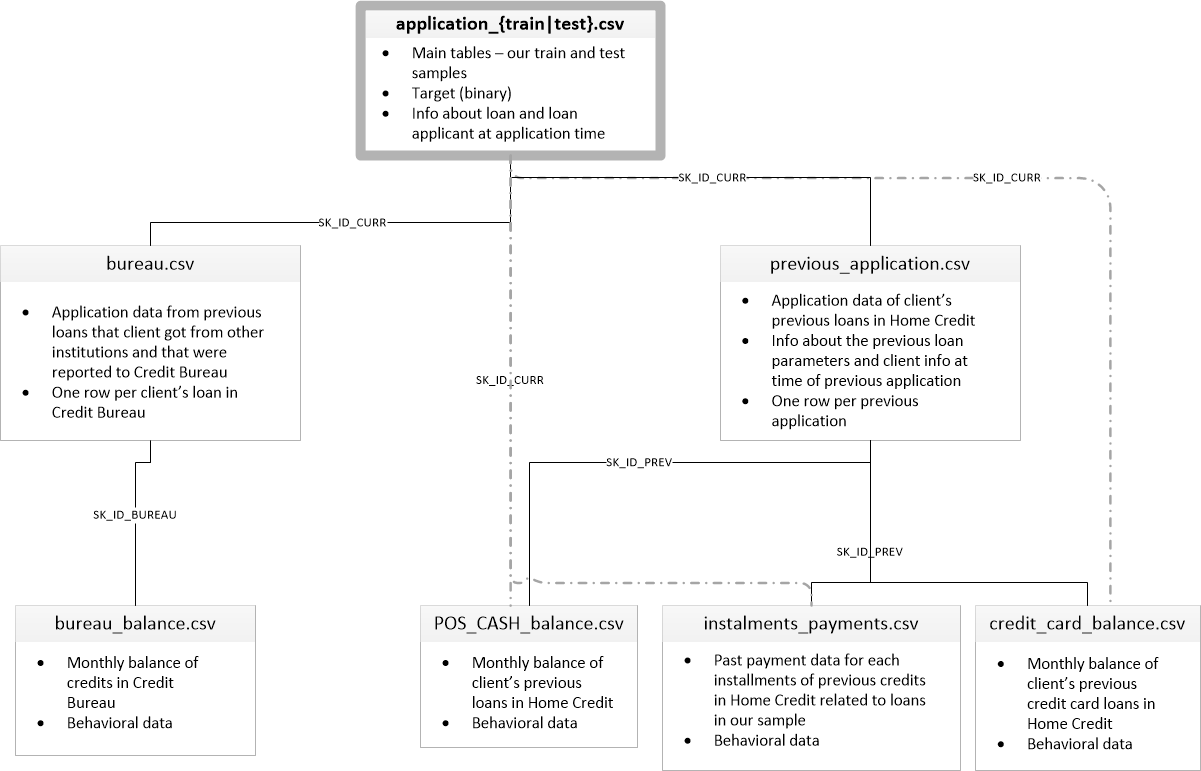

 
# Metric: ROC AUC
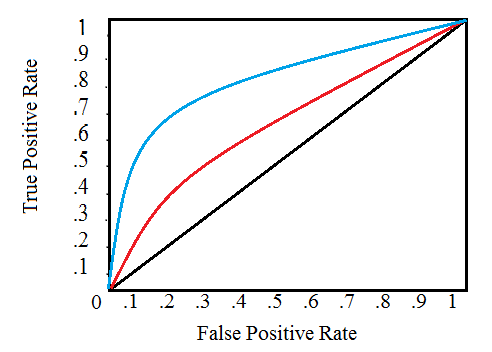


## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dldud\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Read in Data

In [5]:
print(os.listdir("../home-credit-default-risk/"))

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'home_credit1(1st).ipynb', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find *trends, anomalies, patterns, or relationships within the data*. The goal of EDA is to learn what our data can tell us.
The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

## Examine the Distribution of the Target Column

In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

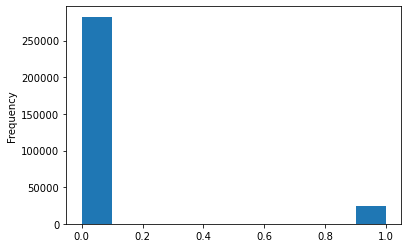

In [9]:
app_train['TARGET'].astype(int).plot.hist()

imbalanced class problem

상환되지 않은 대출보다 적시에 상환된 대출이 훨씬 더 많음. 
더 정교한 기계 학습 모델에 들어가면 이러한 불균형을 반영하기 위해 데이터의 표현에 따라 클래스에 가중치를 부여 할 수 있습니다.

->
weight the classes: https://xgboost.readthedocs.io/en/latest/parameter.html

## Examine Missing Values
각 컬럼별 널 값 확인

In [12]:
def missing_values_table(df):
    # 토털 미싱값
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    #make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    #rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'Missing Values', 1 : '% of Total Values'})
    
    #sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0 #널 값이 존재하는 칼럼에서만 
    ].sort_values('% of Total Values', ascending=False).round(1) #내림차순 + 소수점 1째자리까지
    
    #print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) + 
         " columns that have missing values.")
    
    #return the dataframe with missing information
    return mis_val_table_ren_columns

In [13]:
#Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


이후 작업에서는 대체할 필요없이 결측값을 처리 할 수있는 XGBoost와 같은 모델을 사용할 것. 또 다른 옵션은 누락 된 값의 비율이 높은 열을 삭제하는 것.하지만 이러한 열이 모델에 도움이 될지 미리 알 수는 없으므로 지금은 모든 열을 유지

## Column Types

int64 , float64, object

In [14]:
# number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
#number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### pd.Series.nunique
- object 타입의 요소의 uniuqe 수를 리턴

## Encoding Categorical Variables
* Label encoding
- One-hot encoding
범주형 변수의 카테고리 수가 많을 때, 원핫 인코딩 수행 후 PCA로 차원축소 노력

### Label Encoding and One-Hot Encoding


In [16]:
#create a label encoder object
le = LabelEncoder()
le_count = 0

#iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        #if 2 or fewer unique categories
        if len(list(app_train[col].unique()))<=2:
            #train on the training data
            le.fit(app_train[col])
            
            #transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            #keep track of how many columns were label encoded
            le_count += 1
    
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [17]:
#one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [24]:
app_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=239)

In [23]:
set(app_train.columns) - set(app_test.columns)

{'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'TARGET'}

|FEATURE NAME|N|CAT|
|--------------|---|---|
|NAME_CONTRACT_TYPE            | 2| |
|CODE_GENDER                  | 3 | XNA|
|FLAG_OWN_CAR                   |2| |
|FLAG_OWN_REALTY                |2| |
|NAME_TYPE_SUITE                |7| |
|NAME_INCOME_TYPE               |8 | Maternity leave|
|NAME_EDUCATION_TYPE            |5| |
|NAME_FAMILY_STATUS             |6 | Unknown|
|NAME_HOUSING_TYPE              |6| |
|OCCUPATION_TYPE               |18| |
|WEEKDAY_APPR_PROCESS_START    | 7| |
|ORGANIZATION_TYPE             |58| |
|FONDKAPREMONT_MODE            | 4| |
|HOUSETYPE_MODE                | 3| |
|WALLSMATERIAL_MODE            | 7| |
|EMERGENCYSTATE_MODE           | 2| |
dtype: int64

### Aligning Training and Testing Data
training과 testing data는 같은 features를 가지고 있어야 함! 
그러나 학습 데이터셋에 테스트 데이터셋이 가지지 않은 범주형 object 내 카테고리 변수가 있기 때문에 4가 더 많은 것. 

테스트 데이터에없는 학습 데이터의 열을 제거하려면 데이터 프레임을 정렬해야합니다. 먼저 학습 데이터에서 대상 열을 추출합니다 (테스트 데이터에는 없지만이 정보를 유지해야하기 때문입니다). 정렬을 수행 할 때 축 = 1을 설정하여 행이 아닌 열을 기준으로 데이터 프레임을 정렬해야합니다!

#### pd.align

In [25]:
df1 = pd.DataFrame([[1,2,3,4], [6,7,8,9]], columns=['D', 'B', 'E', 'A'], index=[1,2])
df2 = pd.DataFrame([[10,20,30,40], [60,70,80,90], [600,700,800,900]], columns=['A', 'B', 'C', 'D'], index=[2,3,4])

In [26]:
print(df1)

   D  B  E  A
1  1  2  3  4
2  6  7  8  9


In [27]:
print(df2)

     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900


In [28]:
a1, a2 = df1.align(df2, join='outer', axis=1)
print(a1)
print(a2)

   A  B   C  D  E
1  4  2 NaN  1  3
2  9  7 NaN  6  8
     A    B    C    D   E
2   10   20   30   40 NaN
3   60   70   80   90 NaN
4  600  700  800  900 NaN


In [29]:
a1, a2 = df1.align(df2, join='right', axis=None)
print(a1)
print(a2)

     A    B   C    D
2  9.0  7.0 NaN  6.0
3  NaN  NaN NaN  NaN
4  NaN  NaN NaN  NaN
     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900


In [30]:
a1, a2 = df1.align(df2, join='inner', axis=1)
print(a1)
print(a2)

   D  B  A
1  1  2  4
2  6  7  9
     D    B    A
2   40   20   10
3   90   70   60
4  900  700  600


In [31]:
train_labels = app_train['TARGET']

#align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis= 1)

#add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


피처 수가 너무 많이 늘어 차원축소

## Back to Exploratory Data Analysis
### Anomalies(이상치)


In [32]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [33]:
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

DAYS_BIRTH 열의 숫자는 현재 대출 신청에 상대적으로 기록되기 때문에 음수입니다. 이 통계를 연도 단위로 보려면 -1로 여러 개를 나누고 1 년의 일 수로 나눌 수 있습니다.

In [34]:
app_train['DAYS_EMPLOYED'].describe() #일한 날들, 노동

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

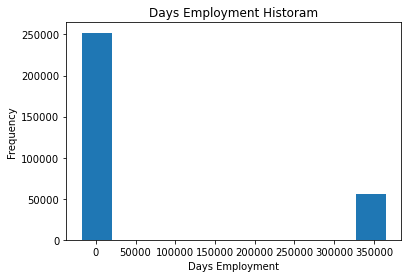

In [36]:
#맞지 않아보임
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Historam');
plt.xlabel('Days Employment')

비정상적인 클라이언트의 하위 집합을 설정하고 나머지 클라이언트보다 채무를 이행하지 않을 비율이 더 높거나 낮은지 살펴 보겠다

In [38]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


놀랍게도 이상치에 속하는 값이 대출금을 반환하지 않는 비율이 더 낮음!!

Text(0.5, 0, 'Days Employment')

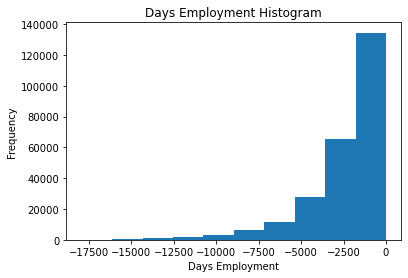

In [39]:
#create an anomalous flag column - 이상치인지 아닌지
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

#replace the anomalous values with ana
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

이상치들을 널로 채우고 그래프를 그려보니 확실한 이상치들이었음. 해당 컬럼에 중앙값이던 뭐든 채울 거임

! 테스트 데이터 셋에도 동일하게 적용 !

In [40]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlations

In [41]:
# find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# display correlations
print('Most Positive Correaltions:\n', correlations.tail(15))
print('\nMost Negative Correaltions:\n', correlations.head(15))

Most Positive Correaltions:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

DAYS_BIRTH가 양의 상관관계가 가장 높음. 즉, 클라이언트가 나이가 들어감에 따라 대출 불이행 가능성이 적다 (예 : 목표 == 0).


### Effect of Age on Repayment

In [42]:
# find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH']) #양수로 바꿔줌
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

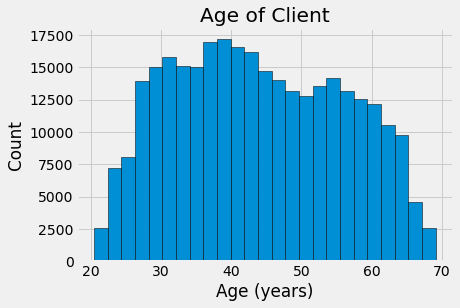

In [43]:
# 나이를 먹을 수록(+) 대출 상환(0,-)함 -> 음의 상관관계
# 이를 이해하기 쉽게 x 축에 age 변수를 만들어 그릴 것임
# Set the style of plots
plt.style.use('fivethirtyeight')

#plot the distribution of ages in years/abs 적용해서 그냥 365로 나눔
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client');plt.xlabel('Age (years)'); plt.ylabel('Count');

In [44]:
app_train['DAYS_BIRTH'] 

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

대상에 대한 연령의 영향을 시각화하기 위해 다음으로 대상 값에 따라 색상이 지정된 커널 밀도 추정 플롯 (KDE)을 만듭니다. 

Text(0.5, 1.0, 'Distribution of Ages')

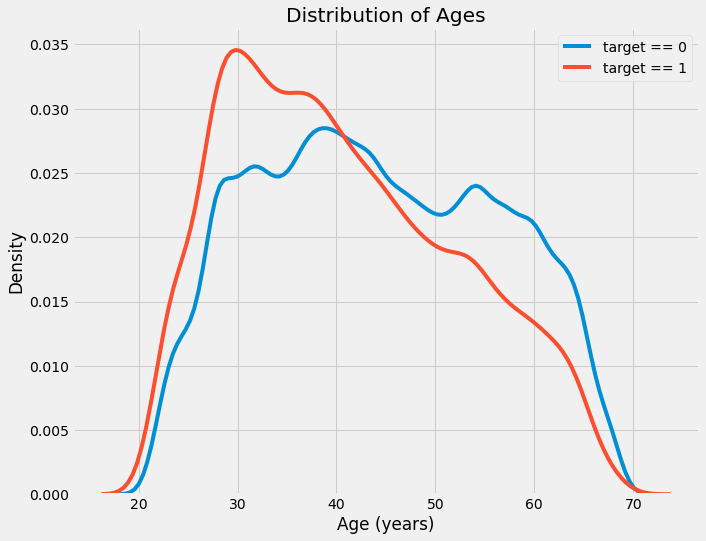

In [45]:
plt.figure(figsize = (10, 8))

#KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

#KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

#labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

나이가 더 어릴 수록 상환하지 않음. 이것은 유의한 상관 관계 (-0.07 상관 계수)는 아니지만,이 변수는 목표에 영향을 미치기 때문에 기계 학습 모델에서 유용 할 것. 

평균 연령대 별 대출 상환 실패를 보자
이 그래프를 만들기 위해 먼저 연령 범주를 각각 5 년의 빈으로 잘라냅니다. 그런 다음 각 빈에 대해 대상의 평균 값을 계산하여 각 연령 범주에서 상환되지 않은 대출 비율을 알려줍니다.

In [134]:
#age information into a separate dataframe
age_data = app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

#bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [49]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

#### pd.cut
- 동일 길이로 나누기

In [50]:
# group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

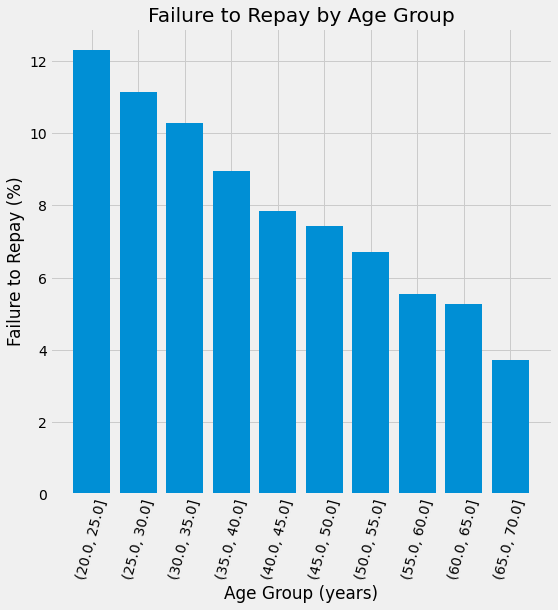

In [51]:
plt.figure(figsize=(8,8))

#graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

#plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

### Exterior Sources
EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 강한 음의 상관관계를 보임.
"normalized score from external data source" 외부데이터 소스의 정규화된 점수

먼저, EXT_SOURCE간 상관관계를 확인

In [52]:
# extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

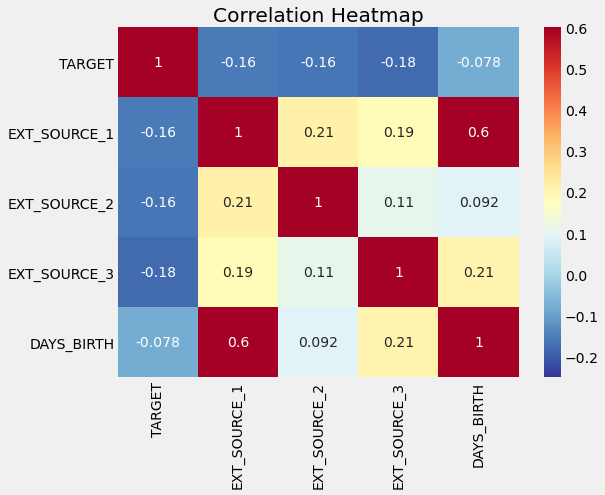

In [53]:
plt.figure(figsize=(8,6))

#heatmap of correlation
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

세 가지 EXT_SOURCE은 모두 대상과 음의 상관 관계를 가지며, 이는 EXT_SOURCE의 값이 증가할수록 고객이 대출금을 상환 할 가능성이 더 높다는 것을 나타냄. 또한 DAYS_BIRTH가 EXT_SOURCE_1과 양의 상관 관계가 있음을 알 수 있다. 

*이는 이 점수의 요인 중 하나가 고객 연령 일 수 있음을 나타냄!!*

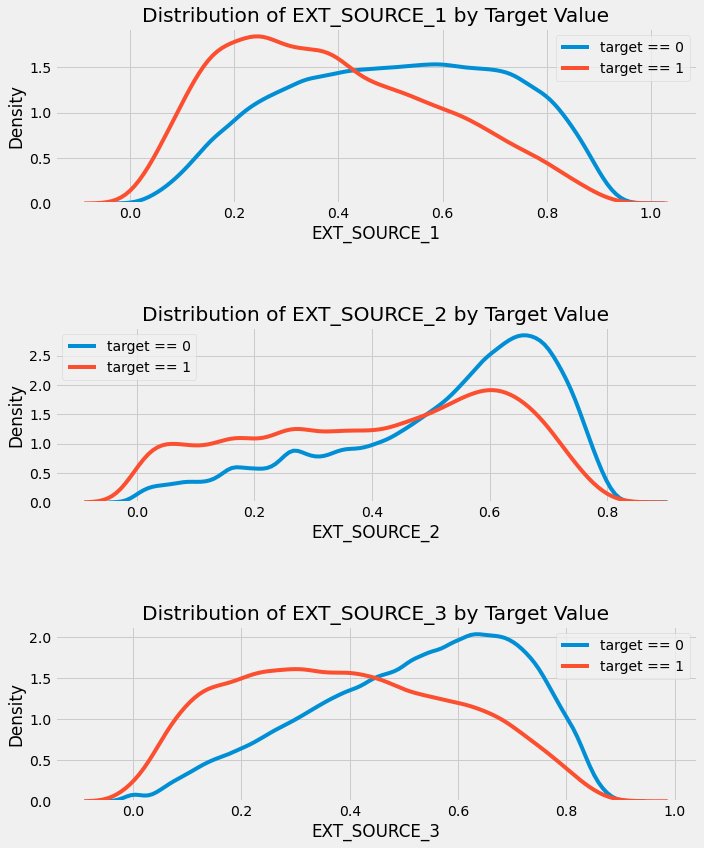

In [55]:
plt.figure(figsize=(10, 12))

#iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']):
    
    #create a new subplot for each source
    plt.subplot(3,1,i+1)
    #plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, source], label='target == 0')
    
    #plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    #label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad=4.5) #서로 인접한 서브 플롯간 여백 설정

ext_source_3에서 가장 두드러진 차이를 보임. target과 상관관계가 그리 높은 편은 아니지만 유의미한 변수가 될 것으로 사료됨.

## Pairs Plot
pairs plot은 여러 변수 쌍 간의 관계와 단일 변수의 분포를 볼 수 있기 때문에 훌륭한 시각화 도구임.

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

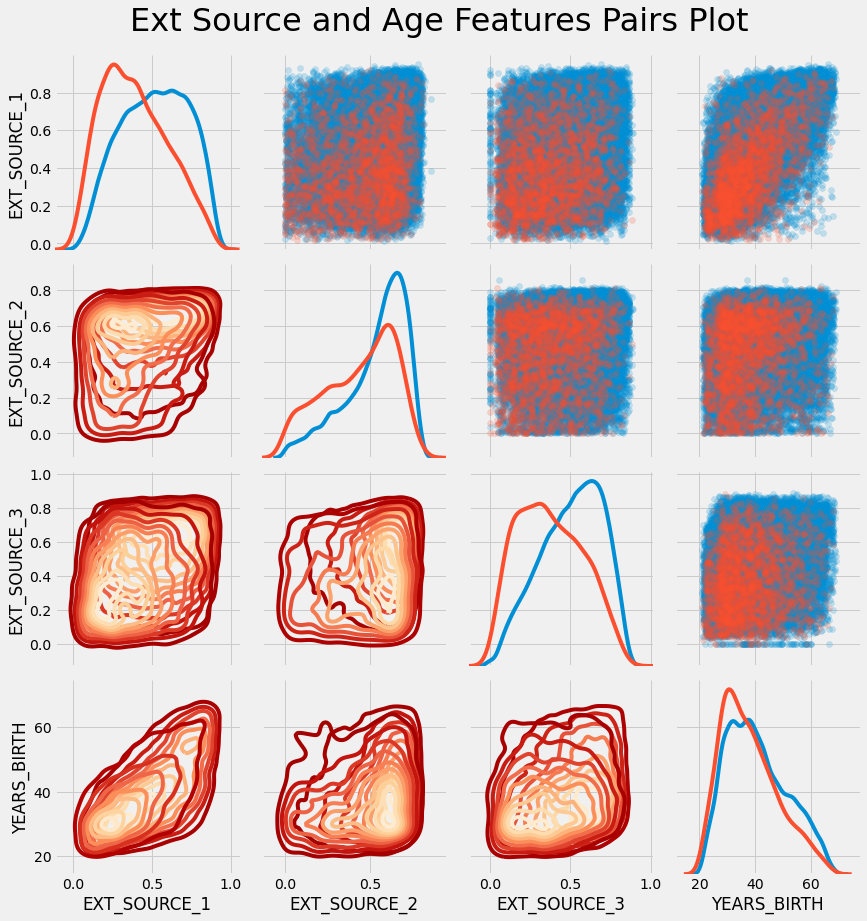

In [57]:
# copy the data for plotting
plot_data = ext_data.drop(columns= ['DAYS_BIRTH']).copy()

#add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

#DROP na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

#function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2, .8), sycoords=ax.transAxes,
               size = 20)
    
#create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                   hue = 'TARGET',
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

#upper is a scatter plot
grid.map_upper(plt.scatter, alpha=0.2)

#diagonal is a histogram
grid.map_diag(sns.kdeplot)

#bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

이 그림에서 빨간색은 상환되지 않은 대출을 나타내고 파란색은 지불 된 대출을 나타냅니다. 데이터 내에서 다른 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BIRTH (또는 이에 상응하는 YEARS_BIRTH)간에 중간 정도의 양의 선형 관계가있는 것으로 보이며이 기능은 클라이언트의 연령을 고려할 수 있음을 나타냅니다.

# Feature Engineering

Feature engineering refers to a geneal process and can involve both feature construction: *adding new features* from the existing data, and *feature selection*: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

* Polynomial features
* Domain knowledge features

## Polynomial Features
여러 개별 변수의 조합 인 이러한 기능은 변수 간의 상호 작용을 캡처하기 때문에 interaction terms라고합니다. 즉, 두 변수 자체는 target에 큰 영향을 미치지 않을 수 있지만 두 변수를 하나의 상호 작용 변수로 결합하면 대상과의 관계를 나타낼 수 있습니다. interaction terms는 일반적으로 통계 모델에서 여러 변수의 효과를 캡처하는 데 사용되지만 기계 학습에서는 자주 사용되지 않습니다. 그럼에도 불구하고 고객이 대출금을 상환할지 여부를 예측하는 데 모델이 도움이 될 수 있는지 몇 가지를 시도해 볼 수 있습니다.

차수를 너무 높이면 피처수가 기하급수적으로 늘고 이는 과적합을 일으키기에 되도록이면 피하도록

In [74]:
#make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

#imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns =['TARGET'])

#need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

#create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [75]:
#train the polynomial features
poly_transformer.fit(poly_features)

#transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [76]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [77]:
#create a dataframe of the features
poly_features = pd.DataFrame(poly_features, 
                            columns = poly_transformer.get_feature_names(
                            ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

#add in the target
poly_features['TARGET'] = poly_target

#find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

#display most negative and most positive
print(poly_corrs.head(10))
print('\n')
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64


DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [78]:
#put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                 columns = poly_transformer.get_feature_names(
                                 ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

#merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

#merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on ='SK_ID_CURR', how='left')

#align the dataframe
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

#print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape: ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:  (48744, 275)


## Domain Knowledge Features
"attempts at applying limited financial knowledge"

고객이 대출을 불이행할지 여부를 알려주는 데 중요하다고 생각하는 것을 포착하려는 몇 가지 피처들
* CREDIT_INCOME_PERCENT: 고객의 소득에 대한 크레딧 금액의 백분율
* ANNUITY_INCOME_PERCENT:고객의 소득에 대한 대출 연금의 비율
* CREDIT_TERM:지급 기간 (연금이 월 지불액이므로
* DAYS_EMPLOYED_PERCENT: 고객의 연령 대비 고용 된 일수의 비율


In [79]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [80]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### Visualize New Variables

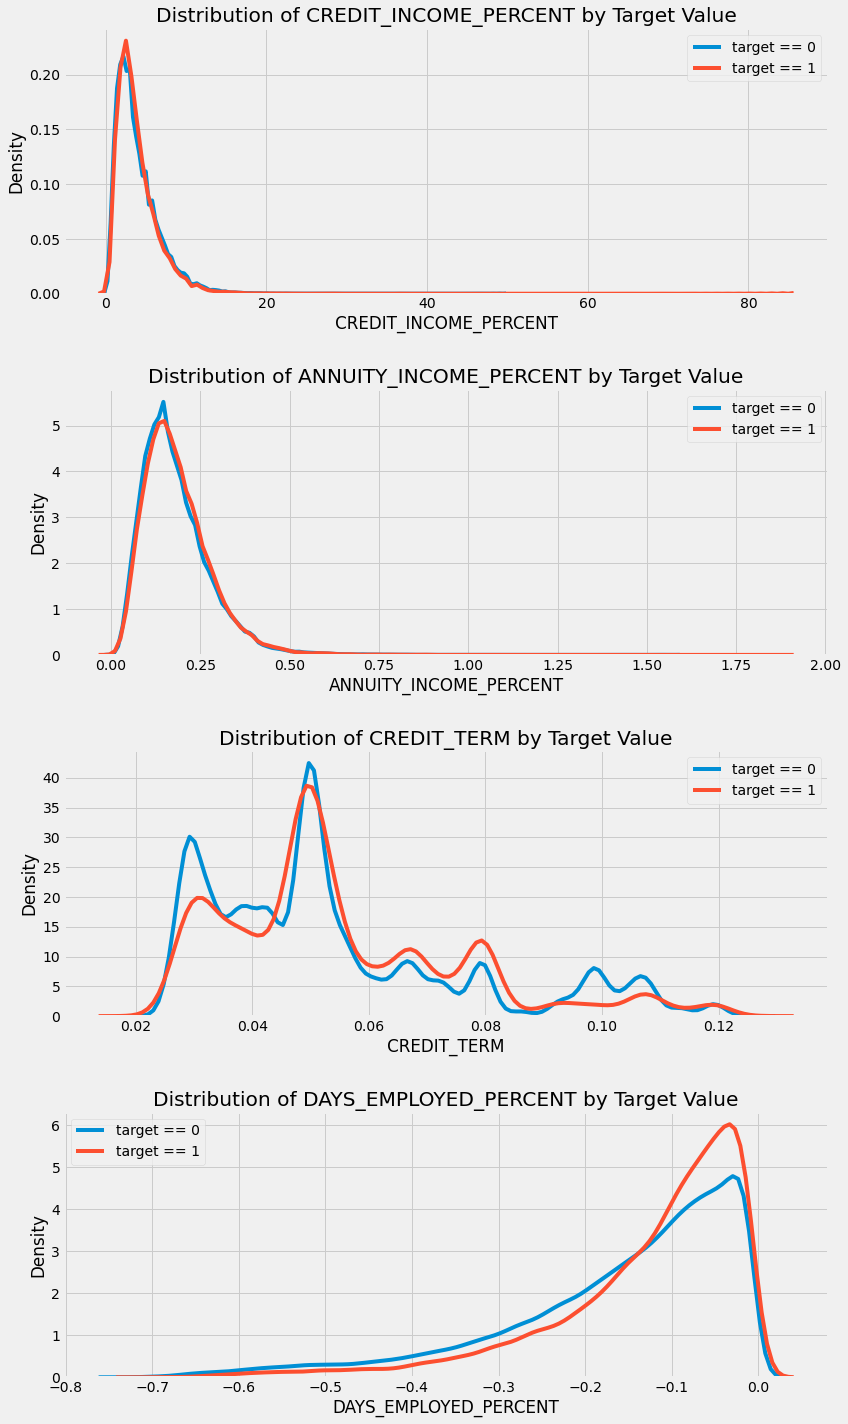

In [81]:
plt.figure(figsize=(12, 20))
#iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']):
    #create a new subplot for each source
    plt.subplot(4, 1, i+1)
    #plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label = 'target == 0')
    
    #plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label = 'target == 1')
    
    #label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

# Baseline
## Logistic Regression Implementation
To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [82]:
from sklearn.preprocessing import MinMaxScaler

#drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
#feature name
features = list(train.columns)

#copy of the testing data
test = app_test.copy()

#Median imputation of missing values
imputer = SimpleImputer(strategy='median')

#scale each feature to 0-1
scaler = MinMaxScaler(feature_range= (0,1))

#fit on the training data
imputer.fit(train)

#transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

#repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


Scikit-Learn의 LogisticRegression을 활용할 것임. 그러나 다르게 할 점이 바로 regularization parameter값인 C를 낮추는 것임. 이는 과적 합을 제어(낮은 값은 과적 합을 감소시킴)


In [83]:
from sklearn.linear_model import LogisticRegression

#make the model with the specified regularization parameter
log_reg = LogisticRegression(C=0.0001)

#train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

#### predict_proba
- m * 2열이 출력됨
- m은 관측치 수
- 첫 번째 열은 목표가 0 일 확률이고 두 번째 열은 목표가 1 일 확률 -> 즉 한 행의 합이 1

이때, 대출이 상환되지 않을 확률(target = 1)을 원하므로 두 번째 열을 선택

In [144]:
#make predictions
#make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [86]:
# submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


## Improved Model: Random Forest
Random Forest는 특히 수백 개의 나무를 사용할 때 훨씬 더 강력한 모델. 랜덤 포레스트에서 100 그루의 나무를 사용.

In [87]:
from sklearn.ensemble import RandomForestClassifier

#make the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state = 50, verbose = 1, n_jobs =-1)

In [89]:
# train on the training data
random_forest.fit(train, train_labels)

#extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

#make prediction on the test data
predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


In [90]:
# make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

In [94]:
train_labels

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [95]:
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.13
1,100005,0.21
2,100013,0.05
3,100028,0.14
4,100038,0.20


### Make Predictions using Engineered Features


In [96]:
poly_features_names = list(app_train_poly.columns)

#impute the polynomial features
imputer = SimpleImputer(strategy= 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

#scale the polynomial features
scaler = MinMaxScaler(feature_range=(0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100, random_state= 50, verbose=1, n_jobs=-1)

In [97]:
#train on the training data
random_forest_poly.fit(poly_features, train_labels)

#make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [98]:
# make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.37
1,100005,0.37
2,100013,0.33
3,100028,0.29
4,100038,0.44


이 모델은 경쟁에 제출했을 때 0.678 점을 받았는데, 이는 엔지니어링 된 기능이 없는 것과 똑같습니다. 이러한 결과를 감안할 때이 경우에는 기능 구성이 도움이 되지 않은 것으로 보입니다.

In [99]:
poly_features.shape

(307511, 275)

### Testing Domain Features

In [100]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

#impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

#scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#train on the training data
random_forest_domain.fit(domain_features, train_labels)

#extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

#make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


In [101]:
#make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.18
1,100005,0.25
2,100013,0.16
3,100028,0.11
4,100038,0.18


In [102]:
domain_features.shape

(307511, 244)

## Model Interpretation: Feature Importances


In [103]:
def plot_feature_importances(df):
    """
    plot importances returned by a model.
    Args: df: feature importances. must have the features in a column called 'features' and the importances in a column called 'importance'
    Returns: show a plot of the 15 most importance features
    df: feature importances sorted by importance (highest to lowers) with a column for normalized importance
    """
    
    #sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    #normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    #make a horizontal bar chart of feature importances
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    #need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align = 'center', edgecolor = 'k')
    
    #set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    #plot labeling
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return df

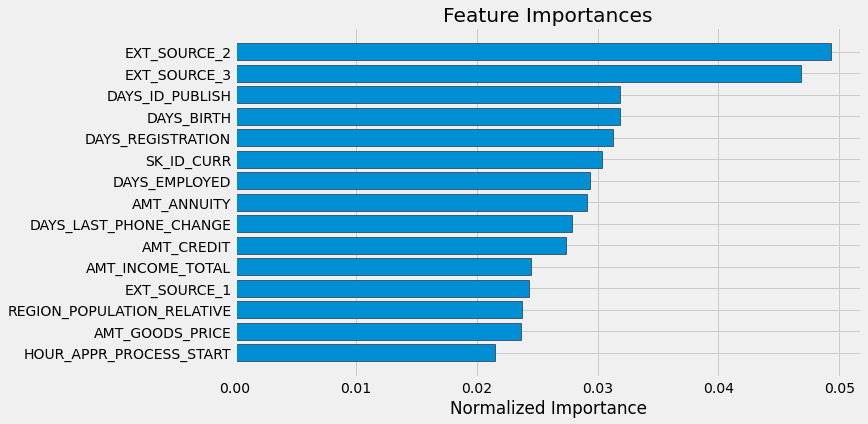

In [105]:
#show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importance)

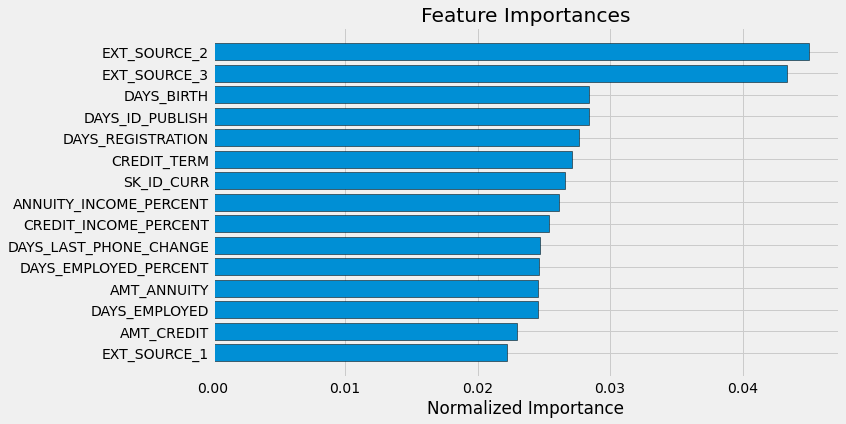

In [106]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

# Conclusions
We followed the general outline of a machine learning project:

1. Understand the problem and the data
2. Data cleaning and formatting (this was mostly done for us)
3. Exploratory Data Analysis
4. Baseline model
5. Improved model
6. Model interpretation (just a little)

# Light Gradient Boosting Machine

In [140]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    """
    Train and test a light gradient boosting model using cv.
    
    Parameters
    ------------
        features(pd.DataFrame):
            dataframe of training features to use for training a model.
            Must include the TARGET column.
        test_features(pd.DataFrame):
            dataframe of testing features to use for making predictions with the model.
        encoding(str, default='ohe'):
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
        n_folds(int, default = 5):
            number of folds to use for cv
        
    Return
    ------------
        submission(pd.DataFrame):
            dataframe with 'SK_ID_CURR' and 'TARGET' probabilities predicted by the model/
        feature_importances(pd.DataFrame):
            dataframe with the feature importances from the model.
        valid_metrics(pd.DataFrame):
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
    
    """
    
    #extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    #extract the labels for training
    labels = features['TARGET']
    
    #remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR','TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    #카테고리형 변수
    cat_indices=[]
    
    #one hot encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        #align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis= 1)
        
        #no categorical indices to record
        cat_indices = 'auto'
        
    elif encoding =='le':
        # create a label encoder
        label_encoder = LabelEncoder()
        
        #list for storing categorical indices
        cat_indices = []
        
        #iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                
                #map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                
                #record the categorical indics
                cat_indices.append(i)
                
    #catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    
    #extract feature names
    feature_names = list(features.columns)
    
    #convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    #empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    #empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    print(len(test_predictions))
    
    #empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    #lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    
    #iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        #training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        #validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        #create the model
        model = lgb.LGBMClassifier(n_estimators = 10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate=0.05, 
                                   reg_alpha =0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        #train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        #record the best iteration
        best_iteration = model.best_iteration_
        
        #record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits #5
       
    
        #make predictions
        test_predictions += model.predict_proba(test_features,num_iteration = best_iteration)[:,1] / k_fold.n_splits
        
        #record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:,1]
        
        #record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        #clean up memory
        gc.enable() #가비지 수거기 인터페이스 -자동 가비지 수거를 활성화
        del model, train_features, valid_features
        gc.collect() #인자가 없으면, 전체 수거를 실행
    
    
    #make the submission dataframe
    print(len(test_ids), len(test_predictions))
    submission = pd.DataFrame({'SK_ID_CURR':test_ids, 'TARGET':test_predictions})
    
    # make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,'importance': feature_importance_values})
    
    #overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    #add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    #needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    #dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [131]:
test_ids = app_test['SK_ID_CURR'][:-1]
print(len(test_ids))
test_features = np.array(app_test)
print(len(test_features))

48744
48744


In [139]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,1,0,1,0,False
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,False
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,False
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,1,0,0,1,0,False
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,0,0,0,0,False
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,0,0,0,0,False
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,0,0,0,0,1,0,1,0,False
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,0,0,0,0,1,0,0,1,0,False


In [129]:
test_ids[:]

0                                                    100001
1                                                    100005
2                                                    100013
3                                                    100028
4                                                    100038
                                ...                        
48740                                                456222
48741                                                456223
48742                                                456224
48743                                                456250
TARGET    [0.07851457787440602, 0.13792630197016637, 0.0...
Name: SK_ID_CURR, Length: 48745, dtype: object

In [133]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
48744
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79887	train's binary_logloss: 0.547648	valid's auc: 0.754949	valid's binary_logloss: 0.563125
Early stopping, best iteration is:
[208]	train's auc: 0.80025	train's binary_logloss: 0.546264	valid's auc: 0.755109	valid's binary_logloss: 0.562276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798518	train's binary_logloss: 0.548144	valid's auc: 0.758539	valid's binary_logloss: 0.563479
Early stopping, best iteration is:
[217]	train's auc: 0.801374	train's binary_logloss: 0.545314	valid's auc: 0.758619	valid's binary_logloss: 0.561732
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79774	train's binary_logloss: 0.54923	valid's auc: 0.762652	valid's binary_logloss: 0.564246
[400]	train's auc: 0.827288	train's binary_logloss: 0.520152	valid's auc: 0.762202	valid's b

In [118]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,1,0,1,0,False
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,False
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,False
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,1,0,0,1,0,False
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,0,0,0,0,False
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,0,0,0,0,False
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,0,0,0,0,1,0,1,0,False
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,0,0,0,0,1,0,0,1,0,False


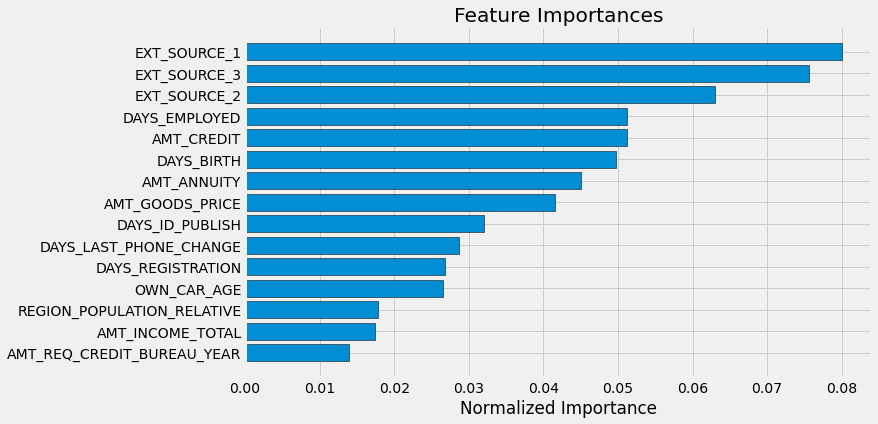

In [135]:
fi_sorted = plot_feature_importances(fi)

In [141]:
app_train_domain['TARGET'] = train_labels

#test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
48744
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804531	train's binary_logloss: 0.541661	valid's auc: 0.762577	valid's binary_logloss: 0.557281
Early stopping, best iteration is:
[237]	train's auc: 0.810671	train's binary_logloss: 0.535426	valid's auc: 0.762858	valid's binary_logloss: 0.553438
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804304	train's binary_logloss: 0.542018	valid's auc: 0.765594	valid's binary_logloss: 0.55808
Early stopping, best iteration is:
[227]	train's auc: 0.808665	train's binary_logloss: 0.537574	valid's auc: 0.765861	valid's binary_logloss: 0.555268
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.803753	train's binary_logloss: 0.542936	valid's auc: 0.770139	valid's binary_logloss: 0.557892
[400]	train's auc: 0.834338	train's binary_logloss: 0.511693	valid's auc: 0.770328	valid'

In [138]:
app_test_domain['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

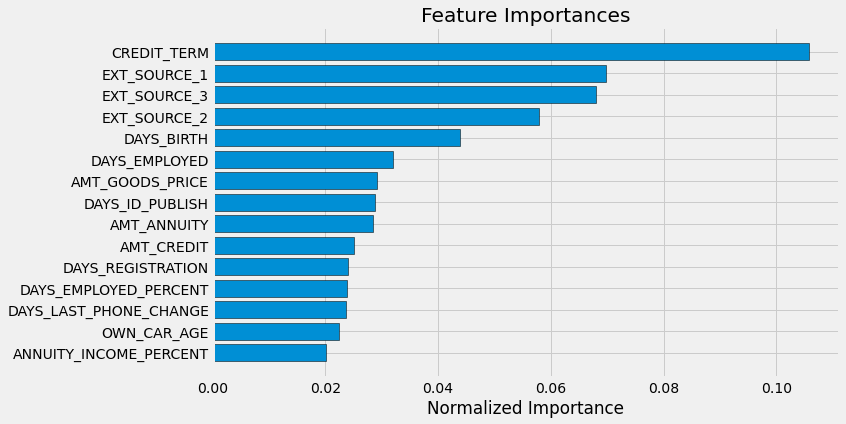

In [142]:
fi_sorted = plot_feature_importances(fi_domain)

In [143]:
submission_domain.to_csv('lgb_domain_features.csv', index = False)